In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import sem
from matplotlib.ticker import FuncFormatter


# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_df = pd.read_csv(mouse_drug_data_to_load)
clinical_df = pd.read_csv(clinical_trial_data_to_load)

# Combine the data into a single dataset
merged_df = pd.merge(mouse_df, clinical_df, on="Mouse ID")

# Display the data table for preview
merged_df.head()


,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2


## Tumor Response to Treatment

In [2]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
tu_response_df = merged_df.loc[:,["Drug","Timepoint","Tumor Volume (mm3)"]]
tu_response_grouped = tu_response_df.groupby(["Drug","Timepoint"],0).mean().reset_index()

# Convert to DataFrame

# Preview DataFrame
tu_response_grouped

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325
5,Capomulin,25,39.939528
6,Capomulin,30,38.769339
7,Capomulin,35,37.816839
8,Capomulin,40,36.958001
9,Capomulin,45,36.236114


In [3]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
tu_response_sem = tu_response_df.groupby(["Drug","Timepoint"],0).agg(lambda x: x.std()/np.sqrt(x.count()))
tu_response_sem = tu_response_sem.reset_index()
# Convert to DataFrame
tu_response_grouped["Tumor Response SEM"] = tu_response_sem["Tumor Volume (mm3)"]

# # Preview DataFrame
tu_response_grouped.head(12)

,Drug,Timepoint,Tumor Volume (mm3),Tumor Response SEM
0,Capomulin,0,45.000000,0.000000
1,Capomulin,5,44.266086,0.448593
2,Capomulin,10,43.084291,0.702684
3,Capomulin,15,42.064317,0.838617
4,Capomulin,20,40.716325,0.909731
5,Capomulin,25,39.939528,0.881642
6,Capomulin,30,38.769339,0.934460
7,Capomulin,35,37.816839,1.052241
8,Capomulin,40,36.958001,1.223608
9,Capomulin,45,36.236114,1.223977


In [4]:
# Minor Data Munging to Re-Format the Data Frames
tu_response_pivot = tu_response_grouped.pivot(index='Timepoint', columns='Drug', values='Tumor Volume (mm3)')

# Preview that Reformatting worked
tu_response_pivot.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


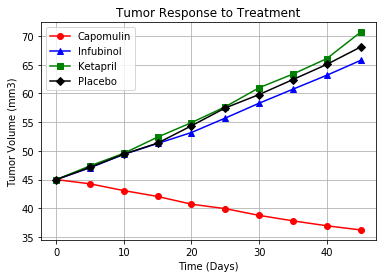

In [5]:
# Generate the Plot (with Error Bars)

# capomulin_sem = tu_response_grouped.loc[tu_response_grouped["Drug"]=="Capomulin"]['Tumor Response SEM']
# infubinol_sem = tu_response_grouped.loc[tu_response_grouped["Drug"]=="Infubinol"]['Tumor Response SEM']
# ketapril_sem = tu_response_grouped.loc[tu_response_grouped["Drug"]=="Ketapril"]['Tumor Response SEM']
# placebo_sem = tu_response_grouped.loc[tu_response_grouped["Drug"]=="Placebo"]['Tumor Response SEM']

capomulin = plt.plot(tu_response_pivot.index, tu_response_pivot["Capomulin"], color="red",marker='o', label="Capomulin")
infubinol = plt.plot(tu_response_pivot.index, tu_response_pivot["Infubinol"],color="blue",marker='^', label="Infubinol")
ketapril = plt.plot(tu_response_pivot.index, tu_response_pivot["Ketapril"],color="green",marker='s', label="Ketapril")
placebo = plt.plot(tu_response_pivot.index, tu_response_pivot["Placebo"],color="black",marker='D', label="Placebo")

# Save the Figure
plt.xlabel('Time (Days)')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Tumor Response to Treatment')
plt.grid()
plt.legend()
plt.show()


In [6]:
# Show the Figure
plt.show()

## Metastatic Response to Treatment

In [7]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
met_res_df = merged_df.loc[:,["Drug","Timepoint","Metastatic Sites"]]
met_res_grouped = met_res_df.groupby(["Drug","Timepoint"],0).mean()

# Convert to DataFrame

# Preview DataFrame
met_res_grouped.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174

In [8]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
met_res_sem = met_res_df.groupby(["Drug","Timepoint"],0).agg(lambda x: x.std()/np.sqrt(x.count()))

# Convert to DataFrame
met_res_grouped["Metastatic Sites SEM"] = met_res_sem["Metastatic Sites"]

# Preview DataFrame
met_res_grouped.head()

Metastatic Sites  Metastatic Sites SEM
Drug      Timepoint                                        
Capomulin 0                  0.000000              0.000000
          5                  0.160000              0.074833
          10                 0.320000              0.125433
          15                 0.375000              0.132048
          20                 0.652174              0.161621

In [9]:
# Minor Data Munging to Re-Format the Data Frames
met_res_grouped = met_res_grouped.reset_index()
met_res_pivot = met_res_grouped.pivot(index='Timepoint', columns='Drug', values='Metastatic Sites')

# Preview that Reformatting worked
met_res_pivot

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118
25,0.818182,1.500000,1.277778,1.631579,1.500000,1.941176,1.357143,0.652174,1.157895,1.687500
30,1.090909,1.937500,1.588235,2.055556,2.066667,2.266667,1.615385,0.782609,1.388889,1.933333
35,1.181818,2.071429,1.666667,2.294118,2.266667,2.642857,2.300000,0.952381,1.562500,2.285714
40,1.380952,2.357143,2.100000,2.733333,2.466667,3.166667,2.777778,1.100000,1.583333,2.785714


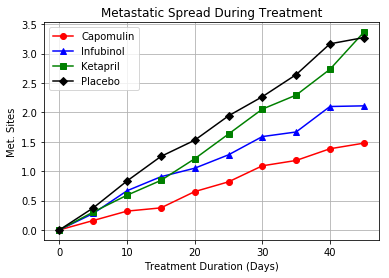

In [10]:
# Generate the Plot (with Error Bars)
capomulin = plt.plot(met_res_pivot.index, met_res_pivot["Capomulin"], color="red",marker='o',label="Capomulin")
infubinol = plt.plot(met_res_pivot.index, met_res_pivot["Infubinol"],color="blue",marker='^',label="Infubinol")
ketapril = plt.plot(met_res_pivot.index, met_res_pivot["Ketapril"],color="green",marker='s',label="Ketapril")
placebo = plt.plot(met_res_pivot.index, met_res_pivot["Placebo"],color="black",marker='D',label="Placebo")

# Save the Figure
plt.xlabel('Treatment Duration (Days)')
plt.ylabel('Met. Sites')
plt.title('Metastatic Spread During Treatment')
plt.grid()
plt.legend()
plt.show()

## Survival Rates

In [11]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
sur_rate_df = merged_df.loc[:,["Drug","Timepoint","Mouse ID"]]
mouse_count = sur_rate_df.groupby(["Drug","Timepoint"],0).count()

# Convert to DataFrame
mouse_count = mouse_count.reset_index()
mouse_count = mouse_count.rename(columns={"Mouse ID":"Mouse Count"})

# Preview DataFrame
mouse_count.head()


,Drug,Timepoint,Mouse Count
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [12]:
# Minor Data Munging to Re-Format the Data Frames
mouse_survival_pivot = mouse_count.pivot(index='Timepoint', columns='Drug', values='Mouse Count')

# Preview that Reformatting worked
mouse_survival_pivot.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17


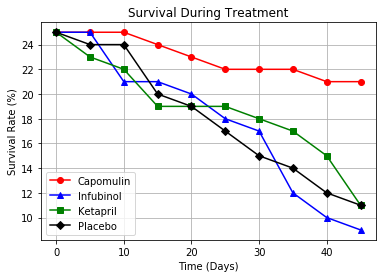

In [13]:
# Generate the Plot (Accounting for percentages)
capomulin = plt.plot(mouse_survival_pivot.index, mouse_survival_pivot["Capomulin"], color="red",marker='o',label="Capomulin")
infubinol = plt.plot(mouse_survival_pivot.index, mouse_survival_pivot["Infubinol"],color="blue",marker='^',label="Infubinol")
ketapril = plt.plot(mouse_survival_pivot.index, mouse_survival_pivot["Ketapril"],color="green",marker='s',label="Ketapril")
placebo = plt.plot(mouse_survival_pivot.index, mouse_survival_pivot["Placebo"],color="black",marker='D',label="Placebo")

# Save the Figure
plt.xlabel('Time (Days)')
plt.ylabel('Survival Rate (%)')
plt.title('Survival During Treatment')
plt.grid()
plt.legend()

# Show the Figure
plt.show()

## Summary Bar Graph

In [14]:
# Calculate the percent changes for each drug
percent_change = merged_df.loc[:,["Drug","Timepoint","Tumor Volume (mm3)"]]

percent_change_grouped = percent_change.groupby(["Drug","Timepoint"])
percent_change_mean = percent_change_grouped['Tumor Volume (mm3)'].mean().values
pct_change_final = [((percent_change_mean[x]-45)/45)*100 for x in range(9,101,10)]
pct_change_series = pd.Series(pct_change_final,index=sorted(percent_change["Drug"].unique()))

# Display the data to confirm
pct_change_series

Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
dtype: float64

In [15]:
bar_df2 = pd.DataFrame

pct_change_series[0]
bar_df2
# bar_df = pd.DataFrame(pct_change_series).reset_index()
# # failing_drugs_df = bar_df.loc[]
# bar_df.plot(kind='bar')

pandas.core.frame.DataFrame

Text(2.4, 3, '51%')

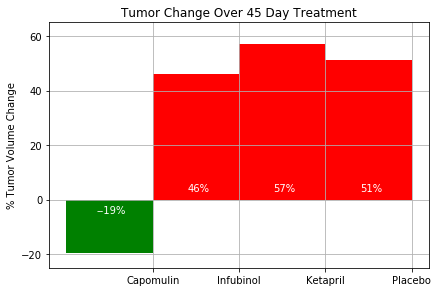

In [16]:
# Store all Relevant Percent Changes into a Tuple
pct_chg_tup = list(zip(pct_change_series,pct_change_series.index))
fig, ax = plt.subplots()

# Splice the data between passing and failing drugs
passing_drugs = pct_chg_tup[1:7]+pct_chg_tup[8:10]
failing_drugs = pct_chg_tup[0]+pct_chg_tup[7]
bar_data = failing_drugs[0:2] + passing_drugs[1] + passing_drugs[2] + passing_drugs[4]

# Orient widths. Add labels, tick marks, etc. 
plt.grid()
plt.tight_layout()
plt.bar(failing_drugs[1],failing_drugs[0],color="green",width=-1,align='edge')
plt.bar(passing_drugs[1][1],passing_drugs[1][0],color="red",width=-1,align='edge')
plt.bar(passing_drugs[2][1],passing_drugs[2][0],color="red",width=-1,align='edge')
plt.bar(passing_drugs[4][1],passing_drugs[4][0],color="red",width=-1,align='edge')
plt.ylim(-25,65)
plt.yticks([-20,0,20,40,60])
plt.title("Tumor Change Over 45 Day Treatment")
plt.ylabel("% Tumor Volume Change")
ax.text(-.65,-5,'-{:,.0%}'.format(failing_drugs[0]/100),color="white")
ax.text(.4,3,'{:,.0%}'.format(passing_drugs[1][0]/100),color="white")
ax.text(1.4,3,'{:,.0%}'.format(passing_drugs[2][0]/100),color="white")
ax.text(2.4,3,'{:,.0%}'.format(passing_drugs[4][0]/100),color="white")
